In [27]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

harvest = {
    'path': './',
    'name': 'commons_harvest__open',
    'trial_id': 'schelling',
    'n': 7,
    'ylim': 100,
    'ylim_r': 600,
}
mushroom = {
    'path': './',
    'name': 'externality_mushrooms__dense',
    'trial_id': 'schelling',
    'n': 5,
    'ylim': 160,
    'ylim_r': 800,
}
clean = {
    # 'path': '/scratch_tmp/users/k21075402/tf_2_15/',
    'path': './',
    'name': 'clean_up',
    # 'trial_id': '96e785e7',
    'trial_id': 'schelling',
    'n': 7,
    'ylim': 1000,
    'ylim_r': 5000,
}

FIGSIZE=(4.8, 1.4)  # for paper
# FIGSIZE=(10, 4)  # for viewing
DPI=500

In [29]:
env = mushroom

FILES = [f'n_c_{i}.json' for i in range(env['n'] + 1)]
rewards_c = []
rewards_d = []
for n_c, f in enumerate(FILES):
    rewards = list(pd.read_json(os.path.join(env['path'], env['name'], env['trial_id'], f))['env_runners']['policy_reward_mean'].values())
    # print(n_c, rewards[:n_c], rewards[n_c:])
    rewards_c.append(np.mean(rewards[:n_c]))
    rewards_d.append(np.mean(rewards[n_c:]))

df = pd.DataFrame({'rewards_c': rewards_c, 'rewards_d': rewards_d})
df['social_welfare'] = df.index * df['rewards_c'].fillna(0) + (env['n']-df.index) * df['rewards_d'].fillna(0)
# shift rewards_c so schelling
df['rewards_c'] = np.roll(df['rewards_c'], -1)
df

/home/richard/mambaforge/envs/markov_sd/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/richard/mambaforge/envs/markov_sd/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/richard/mambaforge/envs/markov_sd/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/richard/mambaforge/envs/markov_sd/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,rewards_c,rewards_d,social_welfare
0,42.865111,27.185378,135.926889
1,62.234111,38.243889,195.840667
2,108.694519,57.591407,297.242444
3,125.838722,115.455667,556.994889
4,119.728178,147.394444,650.749333
5,NaN,NaN,598.640889


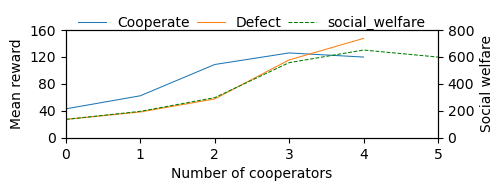

In [30]:
# plot SW on RHS
fig, ax = plt.subplots(figsize=FIGSIZE, facecolor='white')
df.plot(y='rewards_c', ax=ax, label= 'rewards_c', lw=0.75)
df.plot(y='rewards_d', ax=ax, label= 'rewards_d', lw=0.75)

ylim = env['ylim']
ax.set_xlabel('Number of cooperators')
ax.set_ylabel('Mean reward')
ax.set_ylim(0, ylim)
ax.set_xlim(0, env['n'])
ax.set_yticks(np.arange(0, ylim + 1, ylim / 4))

ax2 = ax.twinx()
df.plot(y='social_welfare', ax=ax2, label= 'social_welfare', lw=0.75, linestyle='--', color='green')

ylim_r = env['ylim_r']
ax2.set_ylim(0, ylim_r)
ax2.set_yticks(np.arange(0, ylim_r + 1, ylim_r / 4))
ax2.set_ylabel('Social welfare')

lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, ['Cooperate', 'Defect'] + labels2, bbox_to_anchor=(0, 1.25), loc='upper left', ncol=3, frameon=False, columnspacing=0.5)
ax2.get_legend().remove()

fig.savefig(f'schelling_{env["name"]}', dpi=DPI, bbox_inches='tight')